<a href="https://colab.research.google.com/github/C9342-mhmt/Assignment/blob/main/Statistics_Assignmet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [76]:
# EXERCISE 1

n = 40
sigma = 2.50
mu = 13.20
xbar = 12.20

ztest = (xbar - mu) / (sigma / np.sqrt(n))
ztest

-2.5298221281347035

In [77]:
pvalue = stats.norm.cdf(z_test) # left side area
pvalue

0.005706018193000826

In [78]:
# Comparing "p_value" with "α" value
 
alpha = 0.01   # (α = 1% --> 1-99%) 

if pvalue < alpha:
    print("reject the null")
else:
    print("fail to reject")

reject the null


In [5]:
# EXERCISE 2

α = 0.01

In [79]:
df_soil = pd.read_csv("/content/soil - Sheet1.csv")
df_soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [82]:
df_soil.shape


(35, 2)

In [83]:
df_soil["Soil1"].mean()


1.6918

In [84]:
df_soil["Soil2"].mean()


1.4171142857142858

In [85]:
# H0 : mu1 = mu2

# H1 : mu1 != mu2

In [86]:
stats.ttest_ind(df_soil["Soil1"], df_soil["Soil2"])

# Data has Nan values!

Ttest_indResult(statistic=nan, pvalue=nan)

In [11]:
df_soil.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [88]:
df_soil.isnull()


,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [89]:
itest = stats.ttest_ind(df_soil["Soil1"], df_soil["Soil2"], nan_policy='omit')

itest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [90]:
s = indTest.statistic
s

5.1681473319343345

In [91]:
ppvalue = indTest.pvalue
ppvalue

2.5932287323528147e-06

In [92]:
alpha = 0.01      # alpha/2 = 0.005

if indTest.pvalue < alpha/2:
    print("reject the null")
else:
    print("fail to reject")

reject the null


In [ ]:
# EXERCISE 3

In [93]:
# i)

df_pisa = pd.read_csv("/content/2015 PISA Test - Sheet1.csv")
df_pisa.head()


,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [94]:
df_pisa.describe()  

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [20]:
df_pisa.shape

(70, 6)

In [95]:
# unique values 

df_pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [96]:
df_pisa['Continent_Code'].fillna(value='NA', inplace = True)

In [97]:
df_pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

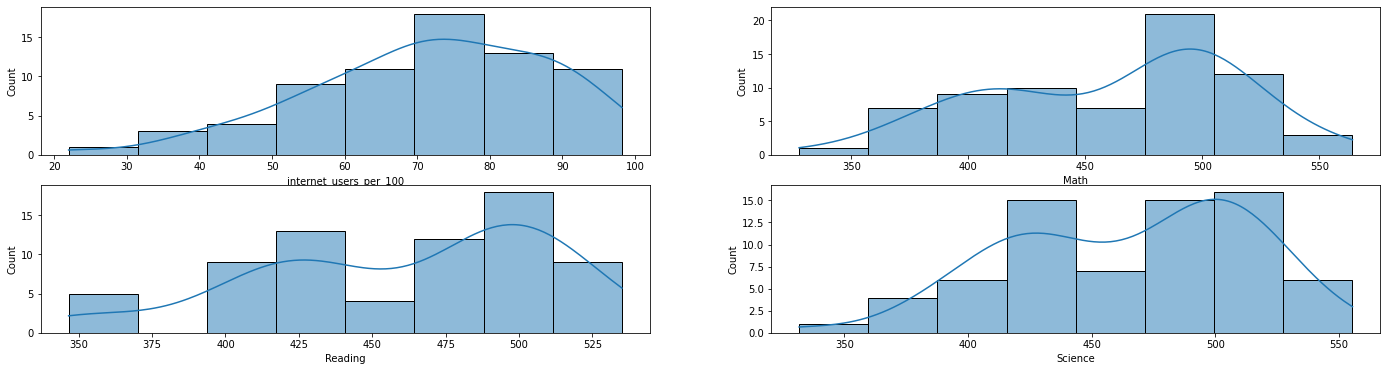

In [98]:
fig, axes = plt.subplots(2,2, figsize=(24,6))

sns.histplot(df_pisa['internet_users_per_100'], kde=True, ax=axes[0,0])
sns.histplot(df_pisa['Math'], kde=True, ax=axes[0,1])
sns.histplot(df_pisa['Reading'], kde=True, ax=axes[1,0])
sns.histplot(df_pisa['Science'], kde=True, ax=axes[1,1]);

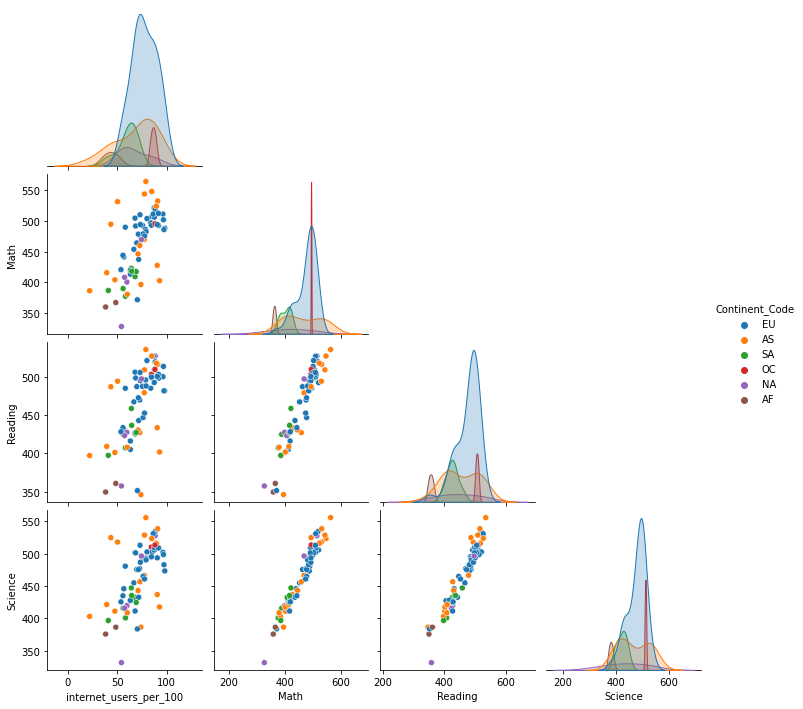

In [99]:
sns.pairplot(df_pisa, hue = 'Continent_Code', corner = True);

In [100]:
# for EU

df_EU = df_pisa[df_pisa["Continent_Code"]=="EU"]
df_EU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [101]:
df_EU.describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [102]:
df_EU.shape

(37, 6)

In [103]:
df_EU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

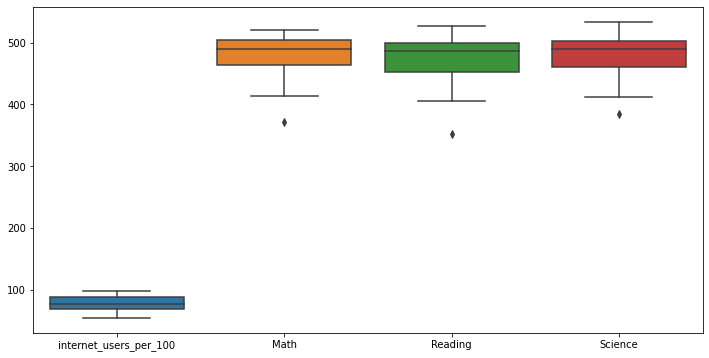

In [104]:
fig = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_EU);

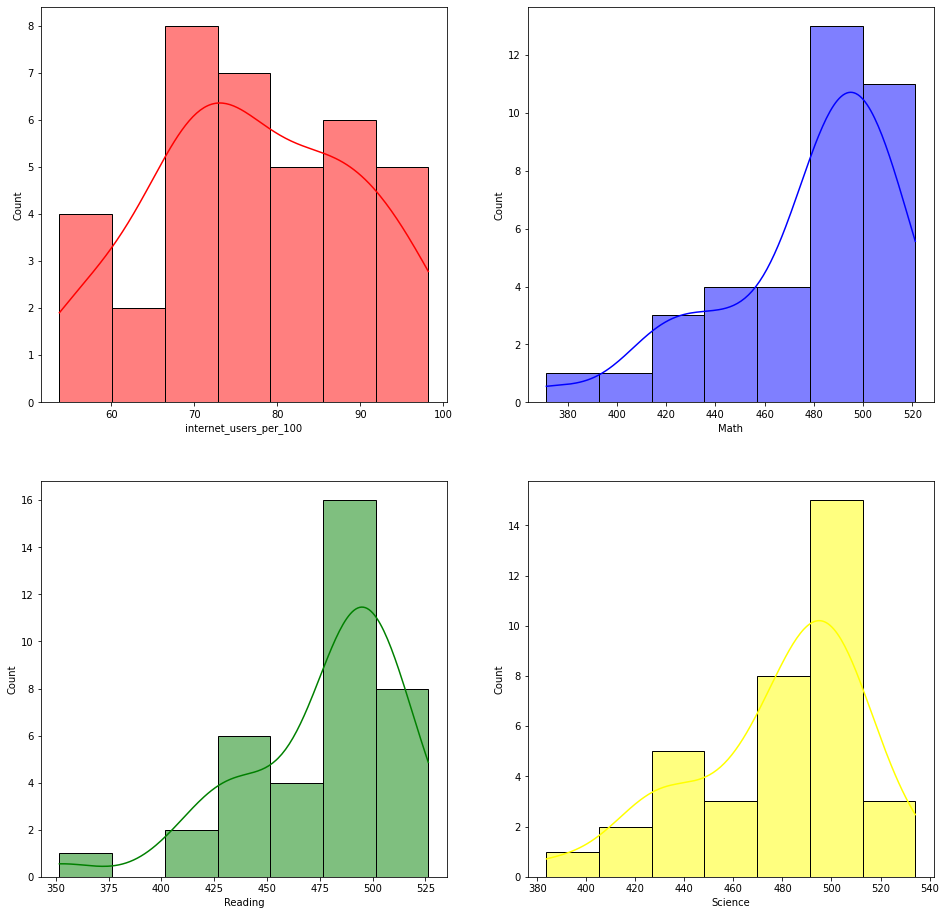

In [105]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(data=df_EU, x="internet_users_per_100", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_EU, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_EU, x="Reading", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df_EU, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

In [107]:
# for AS

df_AS = df_pisa[df_pisa["Continent_Code"]=="AS"]
df_AS.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [108]:
df_AS.describe()


,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [109]:
df_AS.shape


(17, 6)

In [110]:
df_AS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

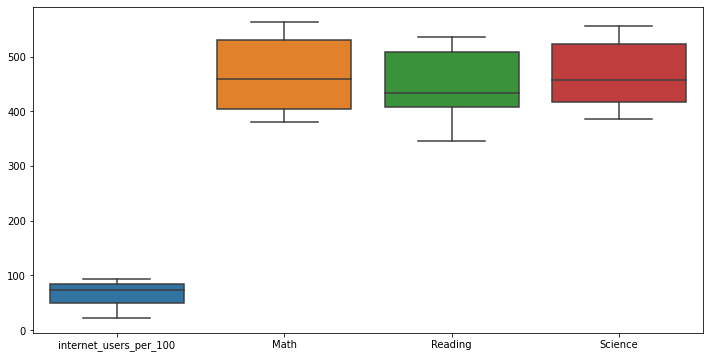

In [111]:
fig = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_AS);

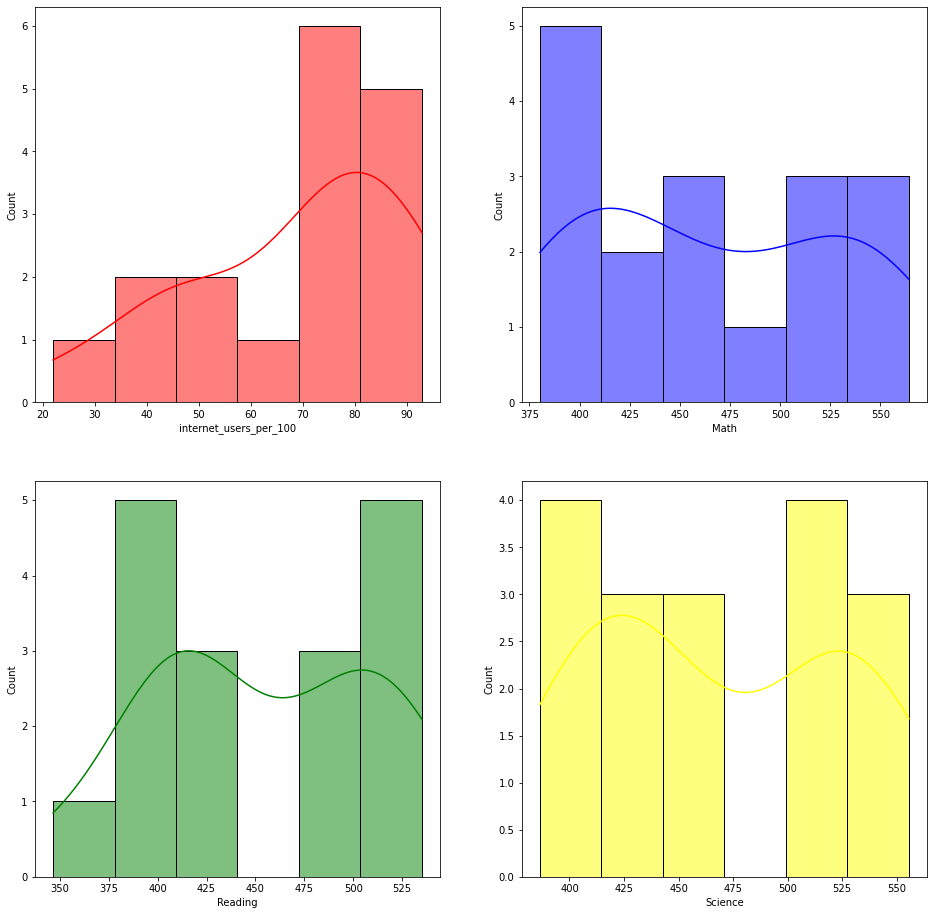

In [112]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(data=df_AS, x="internet_users_per_100", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_AS, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_AS, x="Reading", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df_AS, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

In [113]:
# for SA

df_SA = df_pisa[df_pisa["Continent_Code"]=="SA"]
df_SA.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836


In [114]:
df_SA.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [115]:
df_SA.shape

(7, 6)

In [116]:
df_SA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

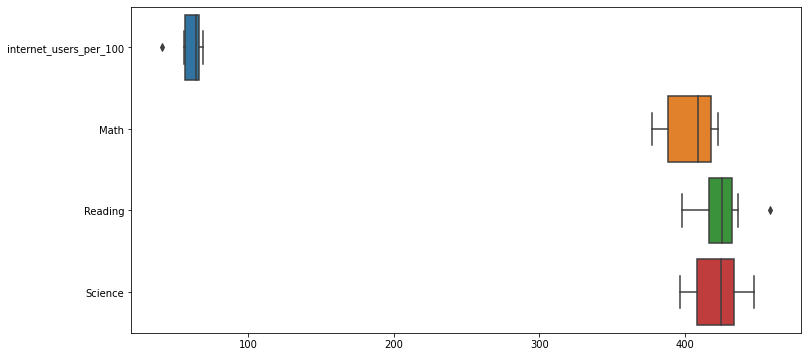

In [118]:
fig = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_SA,orient="h");

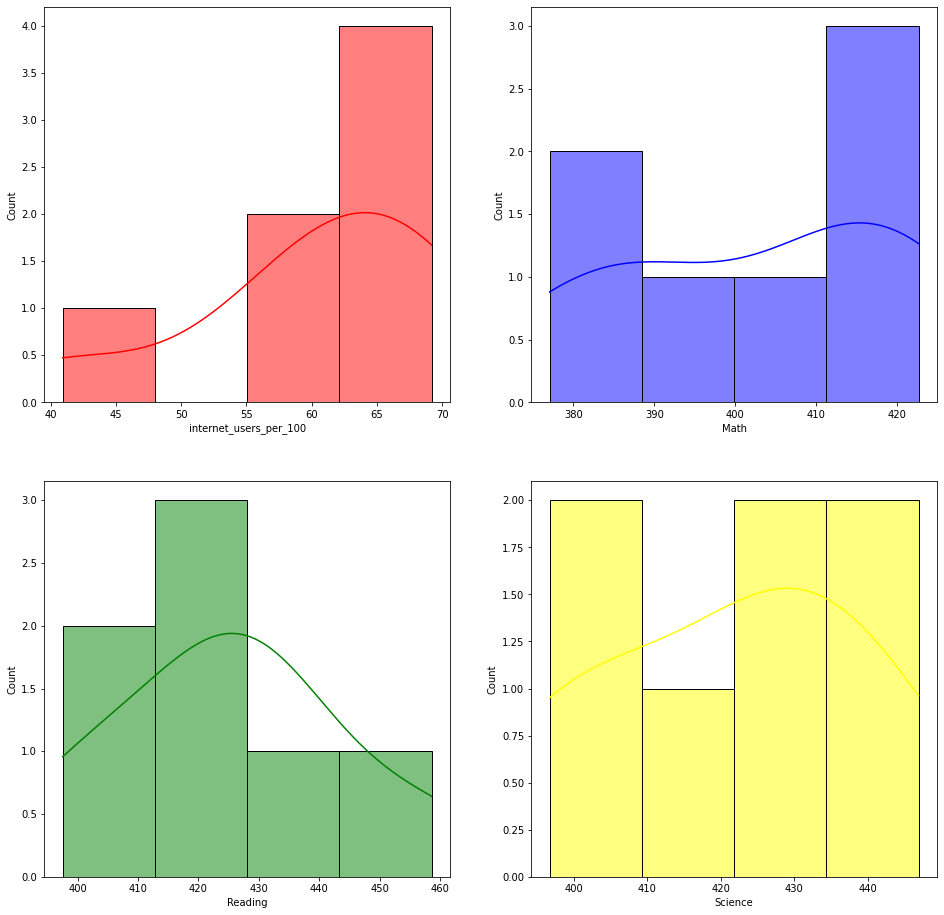

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(data=df_SA, x="internet_users_per_100", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_SA, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_SA, x="Reading", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df_SA, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

In [120]:
# for OC

df_OC = df_pisa[df_pisa["Continent_Code"]=="OC"]
df_OC.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [121]:
df_OC.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [122]:
df_OC.shape

(2, 6)

In [123]:
df_OC.var()

internet_users_per_100     6.706475
Math                       0.880597
Reading                   20.289087
Science                    5.476726
dtype: float64

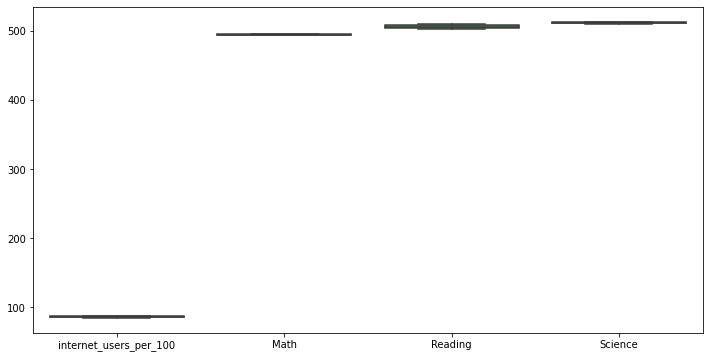

In [124]:
fig = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_OC);

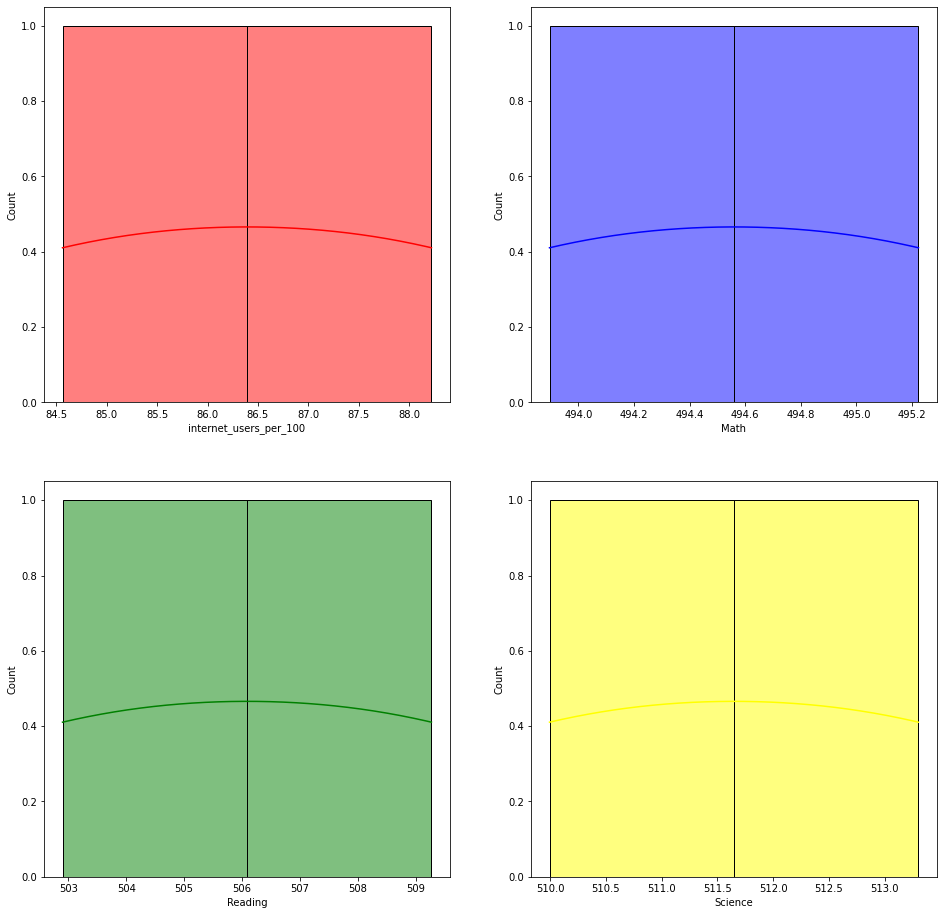

In [125]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(data=df_OC, x="internet_users_per_100", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_OC, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_OC, x="Reading", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df_OC, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

In [126]:
# for AF

df_AF = df_pisa[df_pisa["Continent_Code"]=="SA"]
df_AF.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836


In [127]:
df_AF.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [128]:
df_AF.shape

(7, 6)

In [129]:
df_AF.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

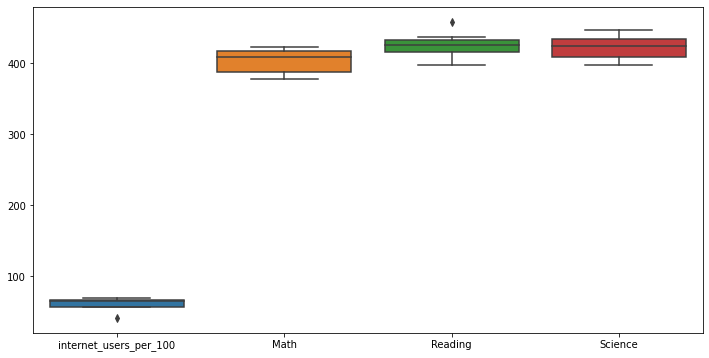

In [131]:
fig = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_AF);

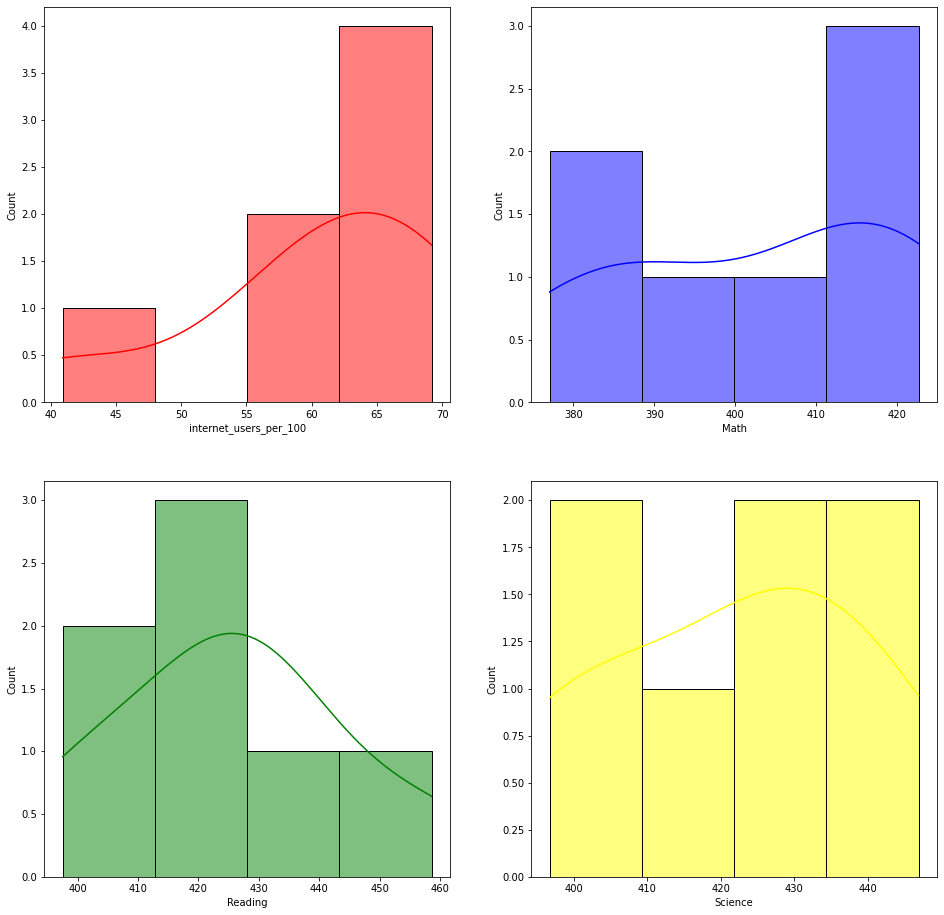

In [132]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(data=df_AF, x="internet_users_per_100", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_AF, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_AF, x="Reading", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df_AF, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

In [134]:
# ii)

statistic, pvalue = stats.ttest_ind(df_EU.Math, df_AS.Math, nan_policy='omit')  

statistic, pvalue

(0.870055317967983, 0.38826888111307345)

In [ ]:
# test statistic = 0.870055317967983 and the corresponding two-sided p-value = 0.38826888111307345.

# two-tailed critical value at 0.05% level of significance is tα/2 = 0.05/2 = 0.025 = 1.965 which is our critical value for t-value comparison.

In [135]:
crt_pvalue = 0.025

if pvalue < crt_pvalue:
    print("reject the null")
else:
    print("fail to reject")

fail to reject


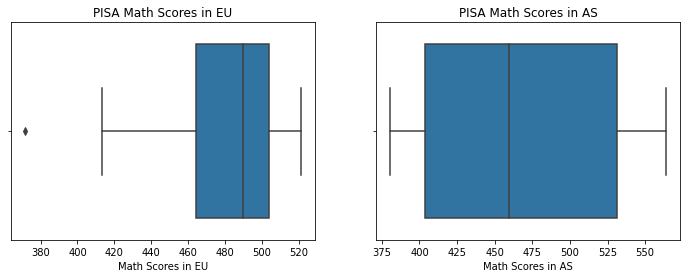

In [136]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.boxplot(df_EU['Math'], ax=axes[0]).set(title='PISA Math Scores in EU')
sns.boxplot(df_AS['Math'], ax=axes[1]).set(title='PISA Math Scores in AS')

axes[0].set(xlabel='Math Scores in EU')
axes[1].set(xlabel='Math Scores in AS');

In [137]:
# EXERCISE 4

df_scores = pd.read_csv("/content/students_2014 - students_2014.csv", sep = ",", na_values = ".", index_col = 0)

In [138]:
df_scores.sample(5)

,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
ids,,,,,,,,,,,,,,,,,,,,,,
45256,3/3/1989,1-Aug-2011,09-May-2016,4.0,Interior design,1.0,1,NaN,174.82,2.0,6.486,0:07:11,84.96,90.88,59.03,79.53,In state,NaN,3.0,31.0,7.0,NaN
36173,6/21/1994,4-Aug-2014,13-May-2019,1.0,bfa music,1.0,1,68.37,171.67,2.0,6.295,0:05:54,76.98,69.59,66.05,71.83,In state,1.0,NaN,NaN,5.0,4.0
24556,11/10/1994,4-Aug-2014,11-May-2020,1.0,finance,1.0,0,NaN,180.44,0.0,6.259,0:09:09,84.09,69.80,NaN,NaN,In state,1.0,NaN,NaN,8.0,1.0
44517,3/11/1995,4-Aug-2014,11-May-2020,1.0,Environmental Science,1.0,1,66.07,137.00,0.0,6.826,0:07:29,69.81,70.58,35.32,70.73,In state,1.0,NaN,NaN,5.0,NaN
26140,10/21/1995,4-Aug-2014,11-May-2020,1.0,Aeronautics (Air Traffic Control),1.0,1,69.02,195.56,0.0,4.634,0:05:36,83.15,83.95,77.60,89.07,Out of state,0.0,3.0,33.0,NaN,5.0


In [139]:
df_scores.shape

(435, 22)

In [140]:
df_scores[["English", "Math"]].isnull().value_counts()

English  Math 
False    False    398
True     False     24
False    True      11
True     True       2
dtype: int64

In [141]:
df_scoresdrop = df_scores[["English", "Math"]].dropna()

In [142]:
df_scoresdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 43783 to 39298
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  398 non-null    float64
 1   Math     398 non-null    float64
dtypes: float64(2)
memory usage: 9.3 KB


In [143]:
df_scores[["English", "Math"]].describe()

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [148]:
english_mean =df_scores['English'].mean()
english_mean

82.78755501222493

In [149]:
math_mean = df_scores['Math'].mean()
math_mean

65.46800947867297

In [151]:
meandiff = english_mean - math_mean
meandiff

17.31954553355196

In [ ]:
# H0: µEnglish - µMath = 0 

# H1: µEnglish - µMath ≠ 0 

In [152]:
stats.ttest_ind(df_scores.dropna()["English"], df_scores.dropna()["Math"])

Ttest_indResult(statistic=10.787205641803522, pvalue=1.1746036768217507e-18)

In [154]:
pair = stats.ttest_rel(df_scores["English"], df_scores["Math"], nan_policy='omit')
pair

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [156]:
t = pair.statistic
t

36.31256898171986

In [157]:
pvalue= pair.pvalue
pvalue

3.071098719220689e-128

In [158]:

critical_pvalue = 0.025

if pvalue < critical_pvalue:
    print("reject the null")
else:
    print("fail to reject")

reject the null
